In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import seaborn as sns
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np

# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"
# location folders
data_in = dirname + "da_data_repo/wms-management-survey/clean/"
data_out = dirname + "da_case_studies/wms-management-survey/"
output = dirname + "da_case_studies/wms-management-survey/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)
# Import the prewritten helper functions
from py_helper_functions import *

In [6]:
# load vienna
df = pd.read_csv(data_in+"wms_da_textbook.csv")

In [7]:
# sample selection
df = df.query('country=="Mexico"&wave==2013&emp_firm>=100&emp_firm<=5000')

In [13]:
df.loc[df.emp_firm<200,'emp3bins']="small"
df.loc[(df.emp_firm>=200) & (df.emp_firm<1000),'emp3bins']="medium"
df.loc[(df.emp_firm>=1000),'emp3bins']="large"

In [17]:
# Figure 3.6
# Boxplot
df2=df[["emp3bins","management"]].query('emp3bins=="small"')

In [19]:
q1=np.quantile(df2.management,0.25)
q2=np.quantile(df2.management,0.5)
q3=np.quantile(df2.management,0.75)
iqr=q3-q1
ub=max(df2.loc[df2.management<q3+1.5*iqr, "management"])
lb=min(df2.loc[df2.management>q1-1.5*iqr, "management"])
out_lb=min(df2.management)
mmin=min(df.management)
mmax=max(df.management)

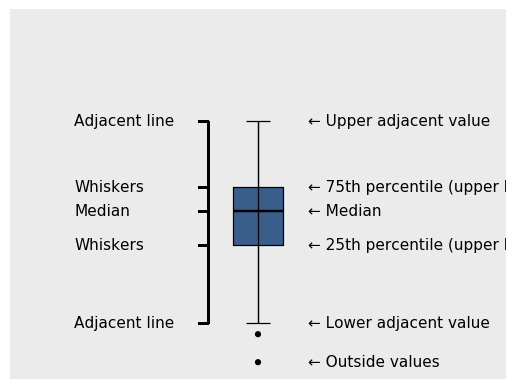

<ggplot: (8762060596508)>

In [51]:
ggplot(df2, aes(x="emp3bins", y="management")) + geom_boxplot(
    color="black", fill=color[0], size=0.5, width=0.1, alpha=0.5
) + stat_boxplot(
    geom="errorbar", width=0.05, color="black", size=0.5
) + scale_y_continuous(
    limits=[mmin, mmax]
) + annotate(
    "text", x=1.1, y=ub, label="← Upper adjacent value", hjust="left"
) + annotate(
    "text", x=1.1, y=q3, label="← 75th percentile (upper hinge)", hjust="left"
) + annotate(
    "text", x=1.1, y=q2, label="← Median", hjust="left"
) + annotate(
    "text", x=1.1, y=q1, label="← 25th percentile (upper hinge)", hjust="left"
) + annotate(
    "text", x=1.1, y=lb, label="← Lower adjacent value", hjust="left"
) + annotate(
    "text", x=1.1, y=out_lb, label="← Outside values", hjust="left"
) + annotate(
    "text", x=0.63, y=ub, label="Adjacent line", hjust="left"
) + annotate(
    "text", x=0.63, y=q3, label="Whiskers", hjust="left"
) + annotate(
    "text", x=0.63, y=q2, label="Median", hjust="left"
) + annotate(
    "text", x=0.63, y=q1, label="Whiskers", hjust="left"
) + annotate(
    "text", x=0.63, y=lb, label="Adjacent line", hjust="left"
) + geom_segment(
    aes(x=0.9, y=lb, xend=0.9, yend=ub)
) + geom_segment(
    aes(x=0.88, y=lb, xend=0.9, yend=lb)
) + geom_segment(
    aes(x=0.88, y=q1, xend=0.9, yend=q1)
) + geom_segment(
    aes(x=0.88, y=q2, xend=0.9, yend=q2)
) + geom_segment(
    aes(x=0.88, y=q3, xend=0.9, yend=q3)
) + geom_segment(
    aes(x=0.88, y=ub, xend=0.9, yend=ub)
)+ theme(
    axis_title_x=element_blank(),
    axis_line_x=element_blank(),
    axis_ticks=element_blank(),
    axis_text_x=element_blank(),
    axis_title_y=element_blank(),
    axis_line_y=element_blank(),
    axis_text_y=element_blank(),
    panel_grid=element_blank(),
    panel_border=element_blank(),
)

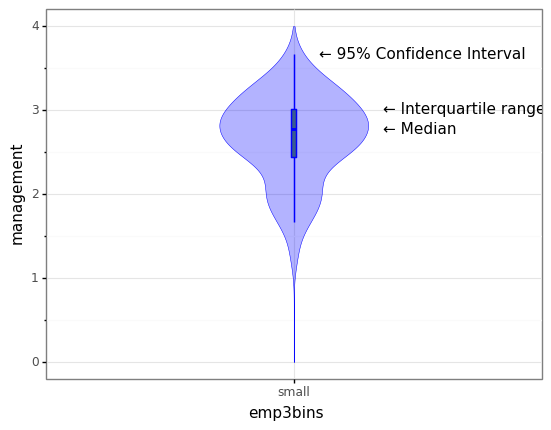

<ggplot: (8762060836834)>

In [65]:
ggplot(df2, aes(x="emp3bins", y="management")) + geom_violin(
    size=0.2,
    width=0.3,
    trim=False,
    show_legend=False,
    color="blue",
    fill="blue",
    alpha=0.3
) + geom_boxplot(
    color="blue", fill=color[0], size=0.6, width=0.01, alpha=0.5, outlier_shape=""
) + annotate(
    "text", x=1.05, y=ub, label="← 95% Confidence Interval", hjust="left"
) + annotate(
    "text", x=1.18, y=q3, label="← Interquartile range", hjust="left"
) + annotate(
    "text", x=1.18, y=q2, label="← Median", hjust="left"
) + ylim(0,4)+theme_bw()